29 32 55 24 23


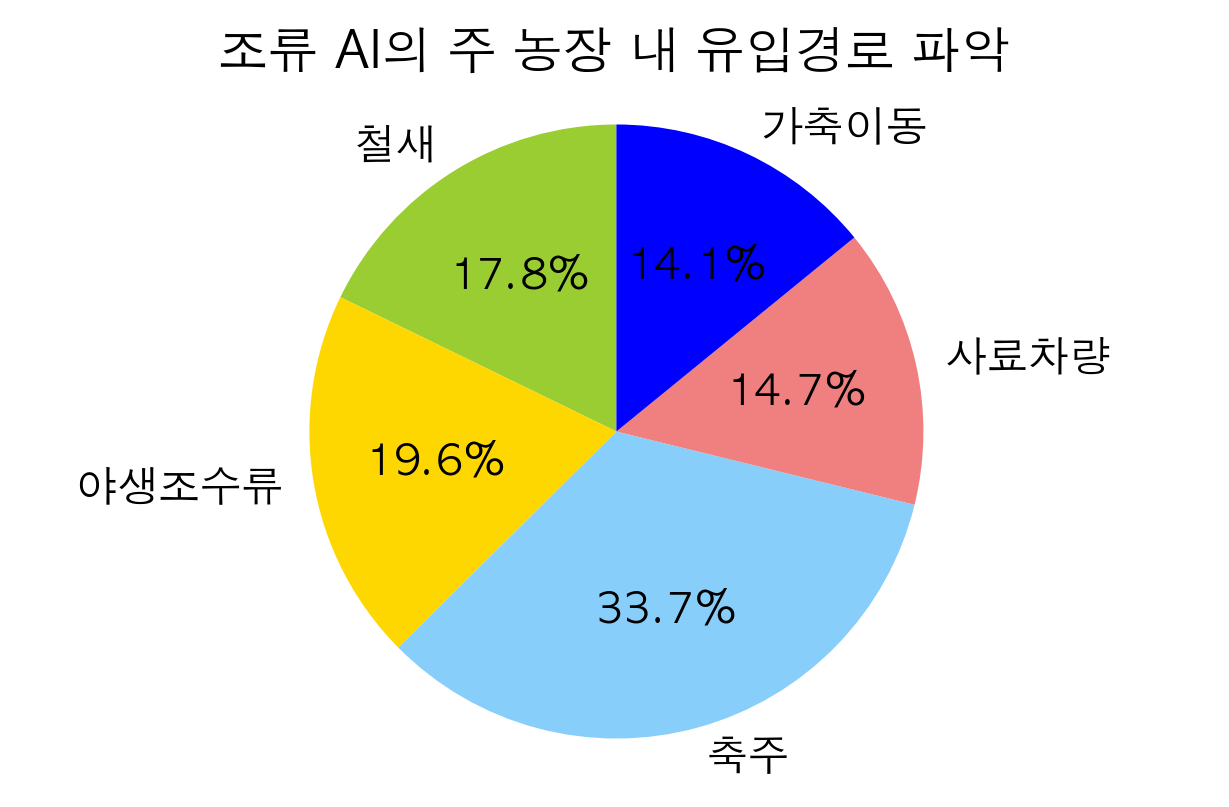

In [3]:
import csv
f = open('gg.csv',  encoding ='cp949')
data = csv.reader(f)

Origin = []
chulsae = 0
wild = 0
master = 0
feed = 0
move = 0

#원인 분석
#철새, 야생조수류. 축주, 사료차량, 가축이동

for row in data :
    Origin.append(row[-1])

for res in Origin:
    if '철새' in res:
        chulsae += 1
    if '야생조수류' in res:
        wild += 1
    if '축주' in res:
        master += 1
    if '사료차량' in res:
        feed += 1
    if '가축이동' in res:
        move += 1
print(chulsae , wild, master, feed, move)




           
import matplotlib.pyplot as plt
plt.rc('font', family = 'AppleGothic')
plt.figure(figsize=(5,3), dpi=300)

size = [chulsae , wild, master, feed, move]  # 값을 바꿔보세요!
labels = '철새', '야생조수류', '축주', '사료차량', '가축이동'
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral','blue']  # 값을 바꿔보세요!

plt.title('조류 AI의 주 농장 내 유입경로 파악')
plt.pie(size, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)

plt.axis('equal')
plt.show()
f.close()

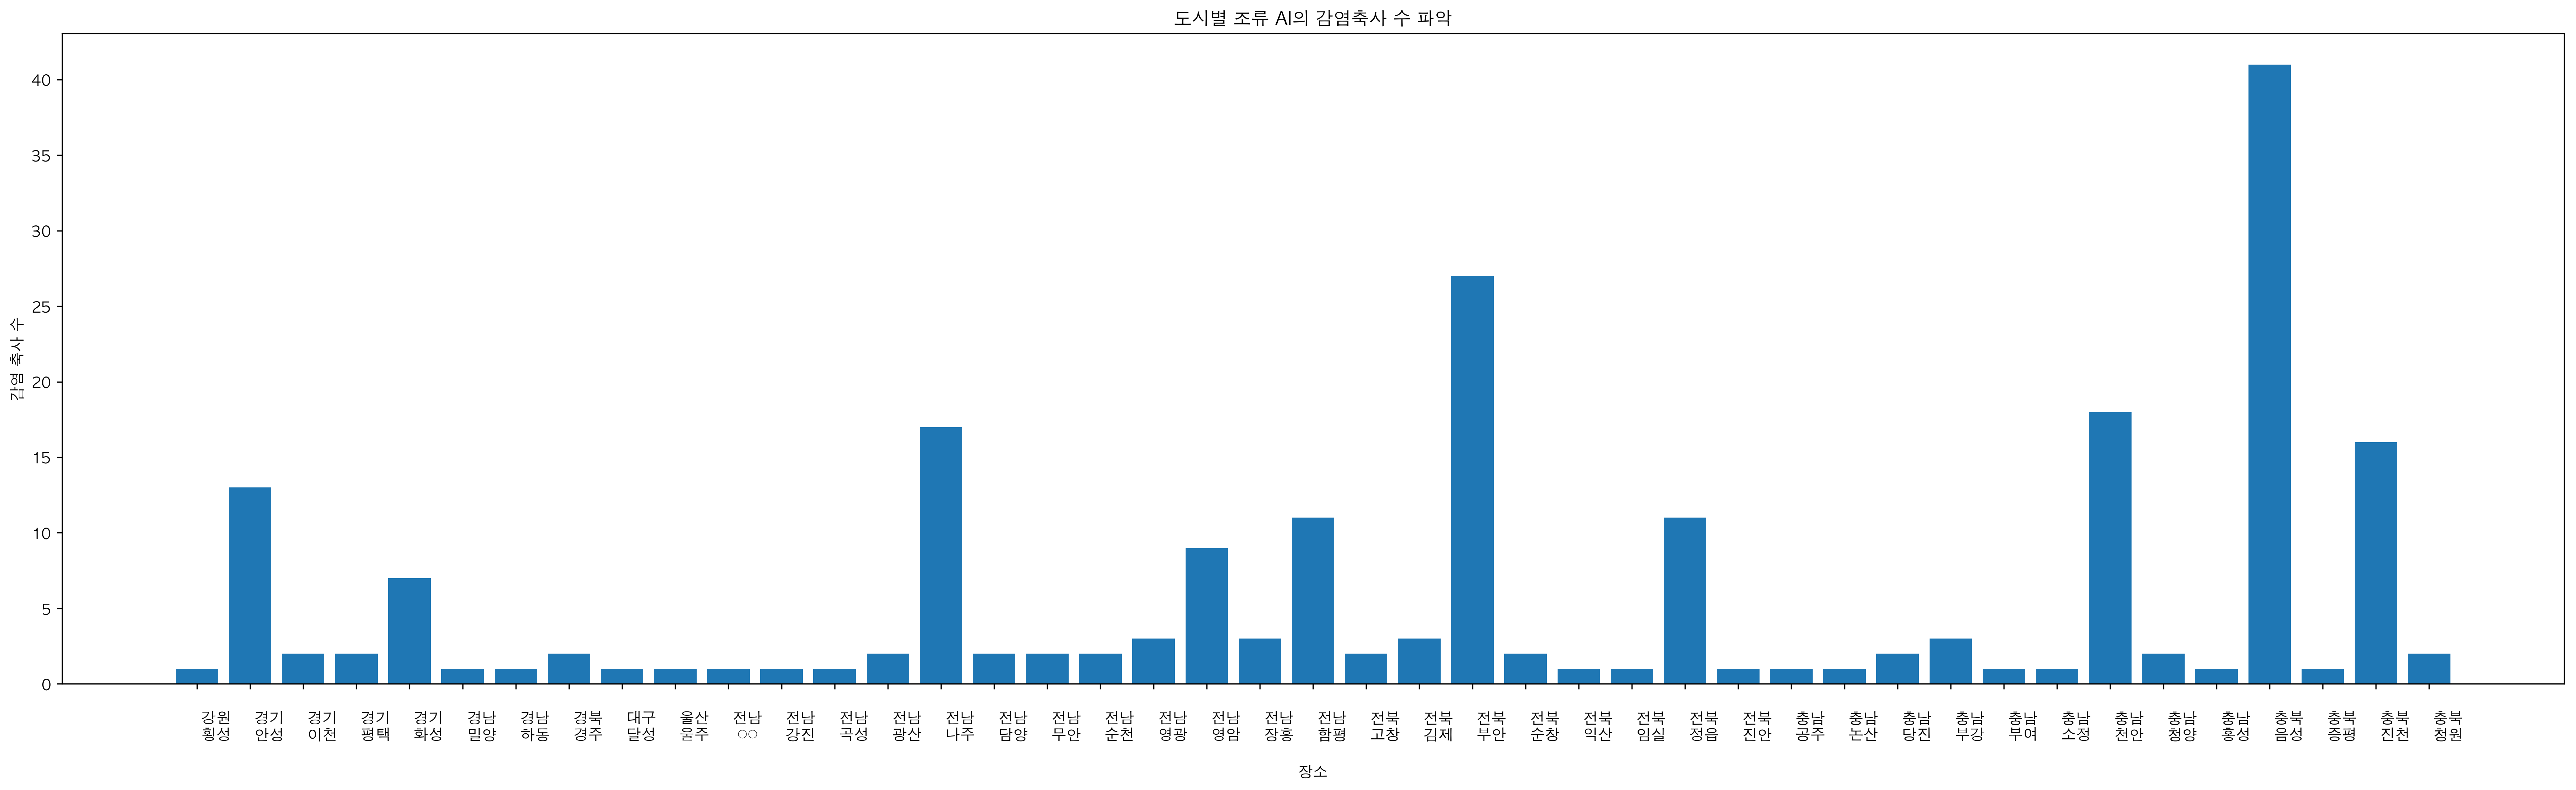

In [93]:
import csv
f = open('gg.csv',  encoding ='cp949')
data = csv.reader(f)


state = []
next(data)
cnt =0 
cnts = []
statename = []
for i in range(0,43):
    cnts.append(1)
    statename.append('a')

def CheckAvaliability(lit):
    global cnt
    global cnts
    if lit not in state:
        state.append(lit)
        cnts[cnt] = 1
        cnt += 1
    elif lit in state:
        cnts[cnt-1] += 1
        
for row in data:
    innerlist = [str(row[0]), str(row[1])]
    CheckAvaliability(innerlist)
    
#이름처리 + 데이터 넣기
for i in range(0,43):
    state[i][1] = state[i][1].strip()
    if len(state[i][0]) == 4:
        state[i][0] = state[i][0][0] + state[i][0][2]
    else:
        state[i][0] = state[i][0][0:2]
        
    multiline = f"""
        {state[i][0]}
        {state[i][1]}
    """
    statename[i] = multiline
   
    
    
import matplotlib.pyplot as plt
plt.rc('font', family = 'AppleGothic')
plt.figure(figsize=(30,8), dpi=300)
plt.title('도시별 조류 AI의 감염축사 수 파악')
plt.bar(statename,cnts) # 값을 바꿔보세요!
plt.xlabel('장소')
plt.ylabel('감염 축사 수')
plt.show()

